In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utilis import *

## Importowanie danych oraz usunięcię zbędnych kolumn odpowiadających za indeksowanie.

In [3]:
data = pd.read_csv('final_data.csv')
data.head()

Unnamed: 0.1  Unnamed: 0                                track  \
0             0           0                            Desperado   
1             1           1                 Empire State Of Mind   
2             2           2                ARE WE STILL FRIENDS?   
3             3           3                           i love you   
4             4           4  Bohemian Rhapsody - Remastered 2011   

               artist                                     album  artist pop  \
0             Rihanna                             ANTI (Deluxe)          87   
1               JAY-Z                           The Blueprint 3          80   
2  Tyler, The Creator                                      IGOR          82   
3       Billie Eilish  WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?          86   
4               Queen      A Night At The Opera (2011 Remaster)          81   

   track pop         track genre  duration release date  danceability  energy  \
0         71       barbadian pop    186466   2016-01-28         0.680   0.609   
1         83  east coast hip hop    276920   2009-09-08         0.491   0.956   
2         81             hip hop    265480   2019-05-17         0.216   0.497   
3         81             art pop    291796   2019-03-29         0.421   0.131   
4         80        classic rock    354320   1975-11-21         0.411   0.404   

   loudness  speechiness  acousticness  instrumentalness  liveness  valence  \
0    -5.222       0.0440        0.3230          0.000000     0.102    0.325   
1    -1.538       0.3920        0.0295          0.000000     0.460    0.811   
2    -8.025       0.0371        0.1280          0.000002     0.111    0.313   
3   -18.435       0.0382        0.9520          0.004530     0.109    0.120   
4    -9.928       0.0511        0.2710          0.000000     0.300    0.226   

     tempo  
0   94.350  
1  173.585  
2  187.308  
3  137.446  
4   71.068

In [4]:
data.drop([data.columns[0], data.columns[1]], axis=1, inplace=True)


## Sprawdzenie czy są jakieś duplikaty, ponieważ pobieram dane z wielu playlist i może być tak, że jakieś piosenki były na kilku z nich. Zduplikowane wartości usuwam.  

In [5]:
duplicate = data.duplicated()
duplicate.sum()

126

In [6]:
data[duplicate]

track                   artist  \
209                                           Stay                  Rihanna   
235               Can't Hold Us (feat. Ray Dalton)  Macklemore & Ryan Lewis   
261                                        Runaway                   AURORA   
301            Bohemian Rhapsody - Remastered 2011                    Queen   
311   Another One Bites The Dust - Remastered 2011                    Queen   
...                                            ...                      ...   
2149                                    In the End              Linkin Park   
2207                          All The Small Things                blink-182   
2209                                      Believer          Imagine Dragons   
2212                                  Use Somebody            Kings of Leon   
2227                                    You And Me                Lifehouse   

                                               album  artist pop  track pop  \
209                            Unapologetic (Deluxe)          87         75   
235                                        The Heist          60         80   
261   All My Demons Greeting Me As A Friend (Deluxe)          69         76   
301             A Night At The Opera (2011 Remaster)          81         80   
311                         The Game (2011 Remaster)          81         83   
...                                              ...         ...        ...   
2149                   Hybrid Theory (Bonus Edition)          83         88   
2207                              Enema Of The State          75         83   
2209                                          Evolve          85         87   
2212                               Only By The Night          74         80   
2227                                       Lifehouse          61         75   

            track genre  duration release date  danceability  energy  \
209       barbadian pop    240706   2012-12-11         0.621   0.310   
235                 NaN    258342   2012-10-09         0.641   0.922   
261             art pop    248826   2016-03-11         0.422   0.302   
301        classic rock    354320   1975-11-21         0.411   0.404   
311        classic rock    214653   1980-06-27         0.933   0.528   
...                 ...       ...          ...           ...     ...   
2149  alternative metal    216880         2000         0.556   0.864   
2207  alternative metal    167066   1999-06-01         0.434   0.897   
2209        modern rock    204346   2017-06-23         0.776   0.780   
2212        modern rock    230760   2008-09-23         0.276   0.715   
2227         neo mellow    195493   2005-03-22         0.459   0.427   

      loudness  speechiness  acousticness  instrumentalness  liveness  \
209    -10.164       0.0283       0.94500          0.000061    0.1170   
235     -4.457       0.0786       0.02910          0.000000    0.0862   
261     -9.214       0.0372       0.62900          0.000078    0.1040   
301     -9.928       0.0511       0.27100          0.000000    0.3000   
311     -6.472       0.1610       0.11200          0.312000    0.1630   
...        ...          ...           ...               ...       ...   
2149    -5.870       0.0584       0.00958          0.000000    0.2090   
2207    -4.918       0.0488       0.01030          0.000000    0.6120   
2209    -4.374       0.1280       0.06220          0.000000    0.0810   
2212    -5.356       0.0432       0.00552          0.000417    0.2010   
2227    -7.734       0.0267       0.11400          0.000000    0.1680   

      valence    tempo  
209     0.125  111.881  
235     0.847  146.078  
261     0.123  114.089  
301     0.226   71.068  
311     0.754  109.967  
...       ...      ...  
2149    0.400  105.143  
2207    0.685  148.708  
2209    0.666  124.949  
2212    0.173  137.028  
2227    0.354  139.902  

[126 rows x 17 columns]

In [7]:
data.drop_duplicates(inplace=True)

## Zapoznanie typów zmiennych.

In [8]:
data.dtypes

track                object
artist               object
album                object
artist pop            int64
track pop             int64
track genre          object
duration              int64
release date         object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

## Zmiana release date na rok. Wykonuję tę operację ze względu na dalsze analizy i modele predykcyjne. 

In [9]:
data['year'] = data['release date'].apply(change_date)
data.drop(columns='release date', inplace=True)


In [10]:
data.head()

track              artist  \
0                            Desperado             Rihanna   
1                 Empire State Of Mind               JAY-Z   
2                ARE WE STILL FRIENDS?  Tyler, The Creator   
3                           i love you       Billie Eilish   
4  Bohemian Rhapsody - Remastered 2011               Queen   

                                      album  artist pop  track pop  \
0                             ANTI (Deluxe)          87         71   
1                           The Blueprint 3          80         83   
2                                      IGOR          82         81   
3  WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?          86         81   
4      A Night At The Opera (2011 Remaster)          81         80   

          track genre  duration  danceability  energy  loudness  speechiness  \
0       barbadian pop    186466         0.680   0.609    -5.222       0.0440   
1  east coast hip hop    276920         0.491   0.956    -1.538       0.3920   
2             hip hop    265480         0.216   0.497    -8.025       0.0371   
3             art pop    291796         0.421   0.131   -18.435       0.0382   
4        classic rock    354320         0.411   0.404    -9.928       0.0511   

   acousticness  instrumentalness  liveness  valence    tempo  year  
0        0.3230          0.000000     0.102    0.325   94.350  2016  
1        0.0295          0.000000     0.460    0.811  173.585  2009  
2        0.1280          0.000002     0.111    0.313  187.308  2019  
3        0.9520          0.004530     0.109    0.120  137.446  2019  
4        0.2710          0.000000     0.300    0.226   71.068  1975

## Sprawdzenie wartości null. 

In [11]:
data.isna().sum()

track                 0
artist                0
album                 0
artist pop            0
track pop             0
track genre         143
duration              0
danceability          0
energy                0
loudness              0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
year                  0
dtype: int64

### Ponieważ wartości null są jedynie w kolumnie track genre, odpowiadającej za gatunek piosenki, wartość null zastępuje wartością "Other"


In [12]:
filt = data['track genre'].isna()
data[filt]

track                   artist  \
52    Can't Hold Us (feat. Ray Dalton)  Macklemore & Ryan Lewis   
154                            Hold On             Gus Seyffert   
224                 Habits of My Heart             Jaymes Young   
226                     Keep on Moving         Michelle Delamor   
297                          Gladiator          Various Artists   
...                                ...                      ...   
2105                                18                     WRRY   
2107        I Did It All for Your Love                   Frettz   
2111                            Plan B                   Frettz   
2120                  act ii: date @ 8                    4batz   
2239             Love Remains The Same           Gavin Rossdale   

                                  album  artist pop  track pop track genre  \
52                            The Heist          60         80         NaN   
154                             Hold On           8          0         NaN   
224                  Habits of My Heart          63         55         NaN   
226                      Keep on Moving           7         21         NaN   
297   Los 100 Mayores Temas de Película           0          0         NaN   
...                                 ...         ...        ...         ...   
2105                                 18          17         30         NaN   
2107         I Did It All for Your Love          27         16         NaN   
2111                             Plan B          27         25         NaN   
2120                   act ii: date @ 8          71         79         NaN   
2239                         Wanderlust          36          1         NaN   

      duration  danceability  energy  loudness  speechiness  acousticness  \
52      258342         0.641   0.922    -4.457       0.0786       0.02910   
154     294200         0.721   0.118   -17.657       0.0638       0.41200   
224     210639         0.392   0.498    -7.630       0.1170       0.66500   
226     183529         0.796   0.677    -8.580       0.0559       0.00741   
297     266426         0.209   0.354   -14.636       0.0347       0.79400   
...        ...           ...     ...       ...          ...           ...   
2105    175554         0.700   0.529    -5.293       0.0339       0.20200   
2107    200930         0.818   0.301   -14.466       0.1390       0.63400   
2111    217021         0.598   0.447    -9.617       0.3860       0.24400   
2120    113684         0.741   0.451   -13.117       0.1010       0.51000   
2239    249440         0.406   0.632    -5.115       0.0344       0.23600   

      instrumentalness  liveness  valence    tempo  year  
52            0.000000    0.0862   0.8470  146.078  2012  
154           0.882000    0.0928   0.0872  128.911  2019  
224           0.000118    0.3400   0.5900   72.048  2014  
226           0.000000    0.0887   0.2180  102.019  2017  
297           0.048600    0.1120   0.0509  137.676  2012  
...                ...       ...      ...      ...   ...  
2105          0.000000    0.1220   0.5580  140.072  2024  
2107          0.000331    0.6150   0.0857  128.973  2020  
2111          0.000000    0.0897   0.2320   93.950  2024  
2120          0.000020    0.4030   0.5580  136.480  2023  
2239          0.000000    0.1800   0.1090  149.258  2012  

[143 rows x 17 columns]

In [13]:
data['track genre'].fillna('Inne', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13364\1619064986.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['track genre'].fillna('Inne', inplace=True)


# EDA - Exploratory Data Analysis

## Sprawdzenie jak różne cechy w naszej bazie wpływają (są skorelowane) na target - czyli popularność piosenki. Korelacja ta obliczna jest za pomocą współczynnika korelacji Pearsona.

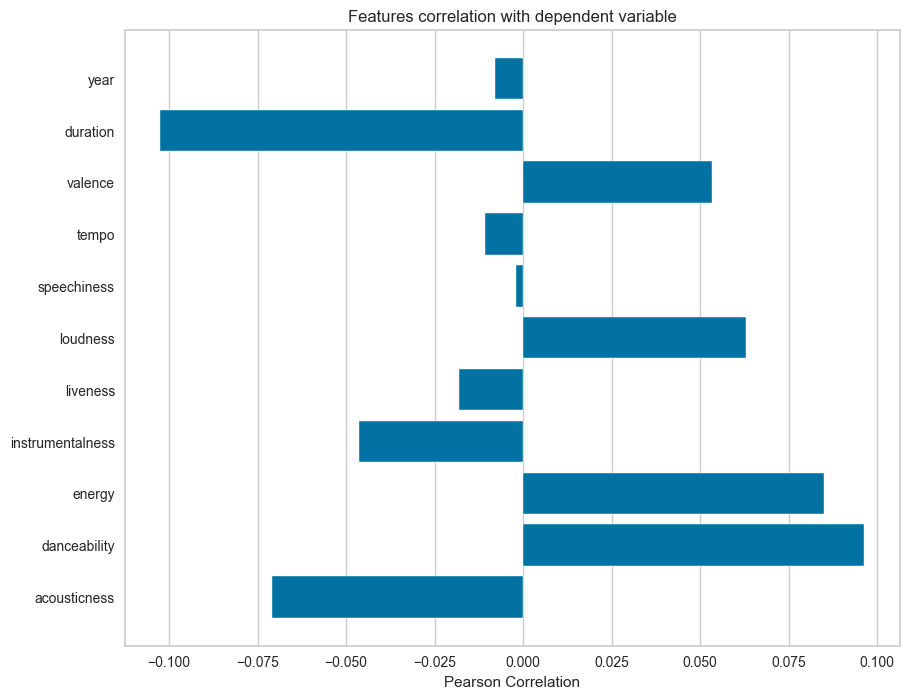

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [14]:
from yellowbrick.target import FeatureCorrelation
import numpy as np

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration', 'year']

X, y = data[feature_names], data['track pop']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,8)
visualizer.fit(X, y)     
visualizer.show()

## Sprawdzenie ile piosenek z danego roku znajduje się w naszej bazie. 

In [15]:
tracks_by_year = data.groupby('year').size().reset_index(name='count')
tracks_by_year

year  count
0   1958      3
1   1959      1
2   1960      1
3   1961      2
4   1962      5
..   ...    ...
62  2020     62
63  2021     56
64  2022     78
65  2023    118
66  2024     78

[67 rows x 2 columns]

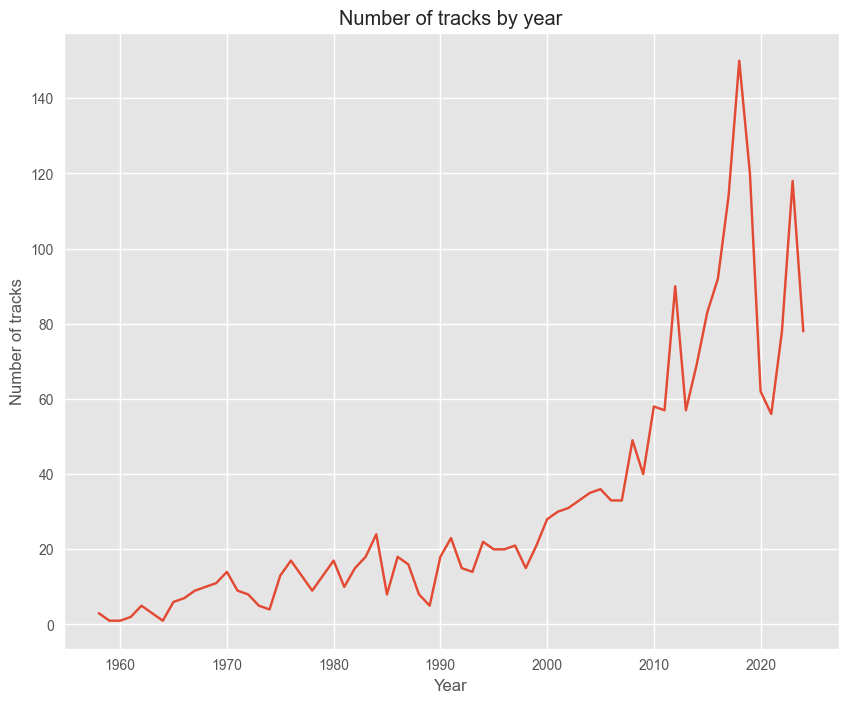

In [16]:
plt.style.use('ggplot')
tracks_by_year.plot(x='year', y='count', legend=None)
plt.xlabel('Year')
plt.ylabel('Number of tracks')
plt.title('Number of tracks by year')
plt.show()

## Charakterystyka piosenek względem lat. Ukazanie trendów w zmianie cech piosenek. 

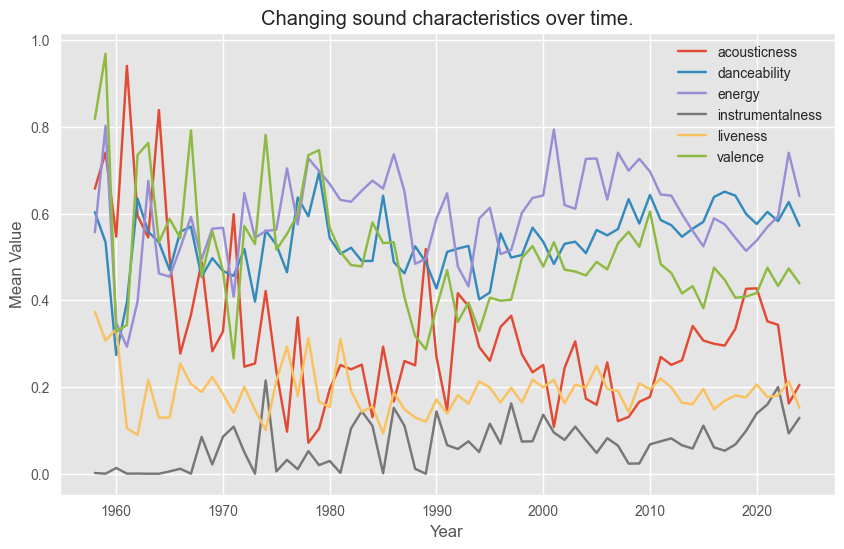

In [17]:

df = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'year']]

df_mean = df.groupby('year').mean().reset_index()
plt.figure(figsize=(10, 6))

for column in ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']:
    plt.plot(df_mean['year'], df_mean[column], label=column)

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Changing sound characteristics over time.')
plt.legend()
plt.grid(True)
plt.show()


## 10 najpopularniejszych wykonawców 

In [18]:
data[['artist pop', 'artist']].sort_values(by='artist pop', ascending=False).drop_duplicates(subset=['artist']).head(20)

artist pop          artist
1602         100    Taylor Swift
1912          93           Drake
1175          92      The Weeknd
1209          92       Bad Bunny
1843          91   Billie Eilish
2076          91    Travis Scott
2048          91  Kendrick Lamar
1931          90      Kanye West
1879          90          Future
1227          90   Ariana Grande
1206          89     Post Malone
2141          89    Metro Boomin
1491          88             SZA
1851          88         Rihanna
1486          88   Morgan Wallen
1189          87          Eminem
260           87    Lana Del Rey
1193          87        Dua Lipa
1933          87       21 Savage
32            87         Beyoncé

## 10 najpopularniejszych utworów

In [19]:
data[['track pop', 'track', 'artist']].sort_values(by='track pop', ascending=False).drop_duplicates().head(20)

track pop                             track              artist
1438         94                      Cruel Summer        Taylor Swift
926          91                         As It Was        Harry Styles
559          91                             Pedro              Jaxomy
1149         91                   Sweater Weather   The Neighbourhood
1139         90                           Starboy          The Weeknd
1441         90  See You Again (feat. Kali Uchis)  Tyler, The Creator
1479         90                            Snooze                 SZA
237          90                   Sweater Weather   The Neighbourhood
1187         89                            Yellow            Coldplay
1499         89                      Pink + White         Frank Ocean
1135         89                   Blinding Lights          The Weeknd
83           89                      Another Love           Tom Odell
152          89                 Someone You Loved       Lewis Capaldi
1473         89                          Daylight       David Kushner
1485         89                          Nonsense   Sabrina Carpenter
563          89                          Whatever                Kygo
87           89              Locked out of Heaven          Bruno Mars
561          89                   I'm Good (Blue)        David Guetta
560          89                             Prada               cassö
1142         88                         One Dance               Drake

## Ukazanie najpopularniejszych piosenek w danym roku


In [20]:
best_songs = data.loc[data.groupby('year')['track pop'].idxmax()]
best_songs[['track', 'year']]

track  year
1735                  Jailhouse Rock  1958
1801                 Johnny B. Goode  1959
1965                         At Last  1960
1027      Can't Help Falling in Love  1961
1831                Oh, Pretty Woman  1962
...                              ...   ...
1135                 Blinding Lights  2020
567   Give It To Me - Full Vocal Mix  2021
926                        As It Was  2022
560                            Prada  2023
559                            Pedro  2024

[67 rows x 2 columns]

## Histogramy zmiennych i ich charakterystyka, ukazanie wartości średnich, maksymalnych i minimalnych dla każdej z cech.


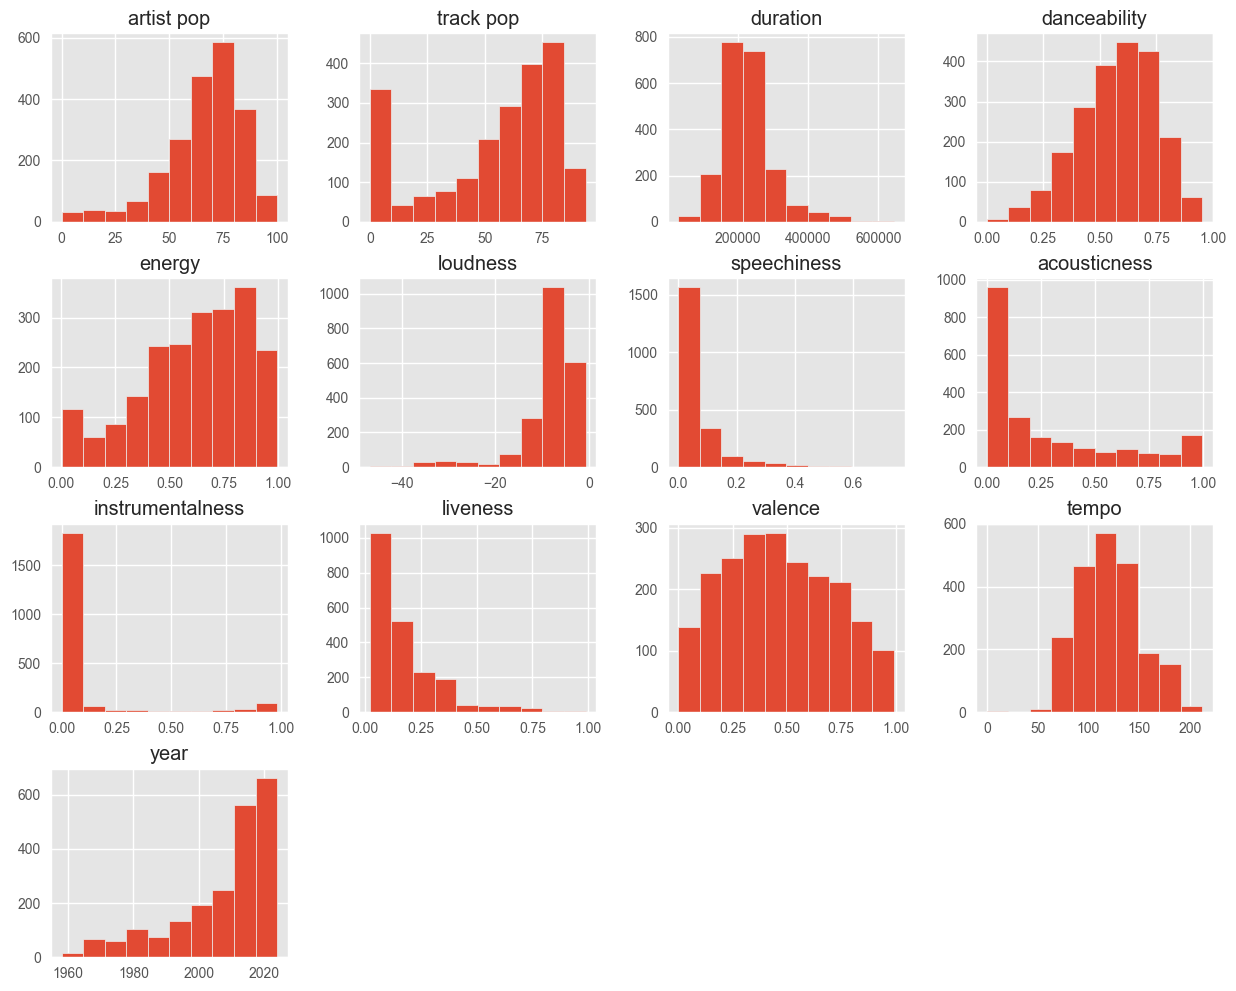

In [21]:
data.hist(figsize=(15,12),bins = 10)
plt.show()

In [22]:
description = data.describe()
description.loc[['min', 'max', 'mean']]

artist pop  track pop       duration  danceability    energy   loudness  \
min     0.000000   0.000000   32014.000000      0.000000  0.000831 -46.852000   
max   100.000000  94.000000  644272.000000      0.954000  0.998000  -0.686000   
mean   65.772856  54.034873  228580.492931      0.574303  0.611347  -8.637834   

      speechiness  acousticness  instrumentalness  liveness   valence  \
min      0.000000      0.000004            0.0000  0.021300  0.000000   
max      0.741000      0.996000            0.9820  0.989000  0.993000   
mean     0.076029      0.276844            0.0845  0.184757  0.465768   

           tempo         year  
min     0.000000  1958.000000  
max   212.004000  2024.000000  
mean  120.875936  2007.592837

## Korelacje między zmiennymi. 

In [23]:
def correlation_plot(feature1, feature2):
    plt.figure(figsize=(10,6))
    sns.regplot(data = data, y= feature1, x = feature2, color = "c").set(title=f"{feature1} vs {feature2}")

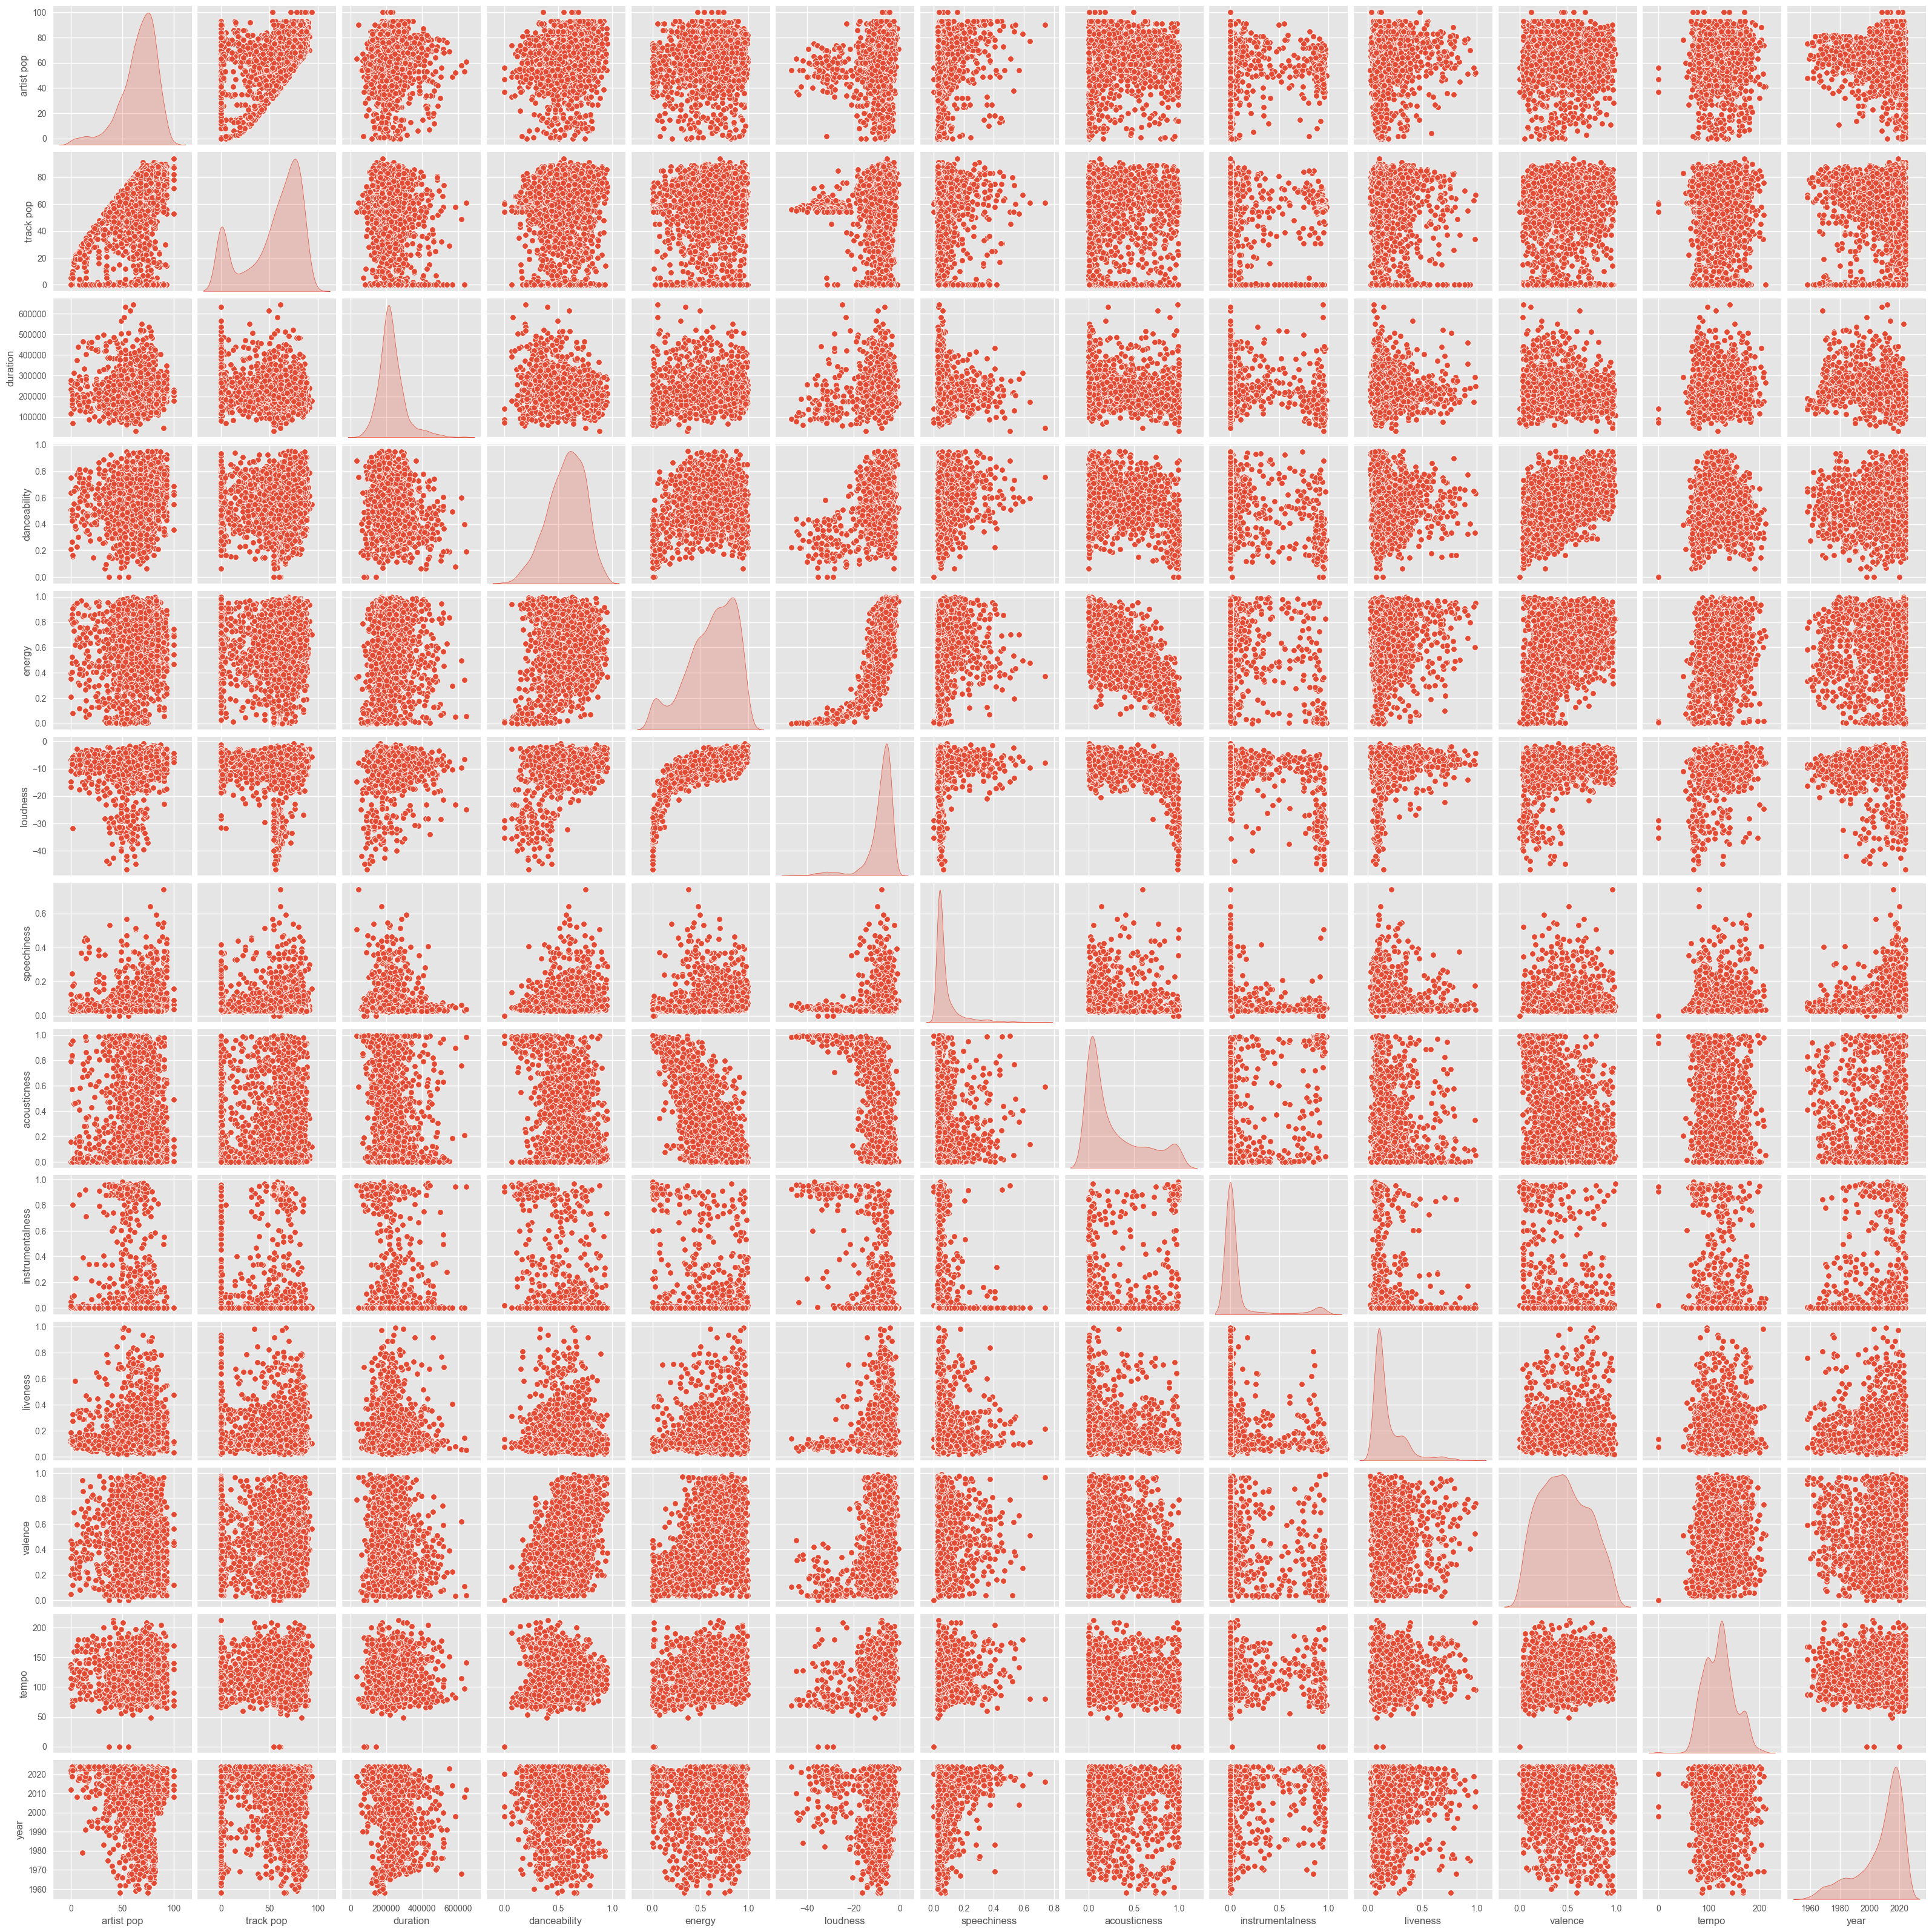

In [24]:
sns.pairplot(data, diag_kind='kde')   

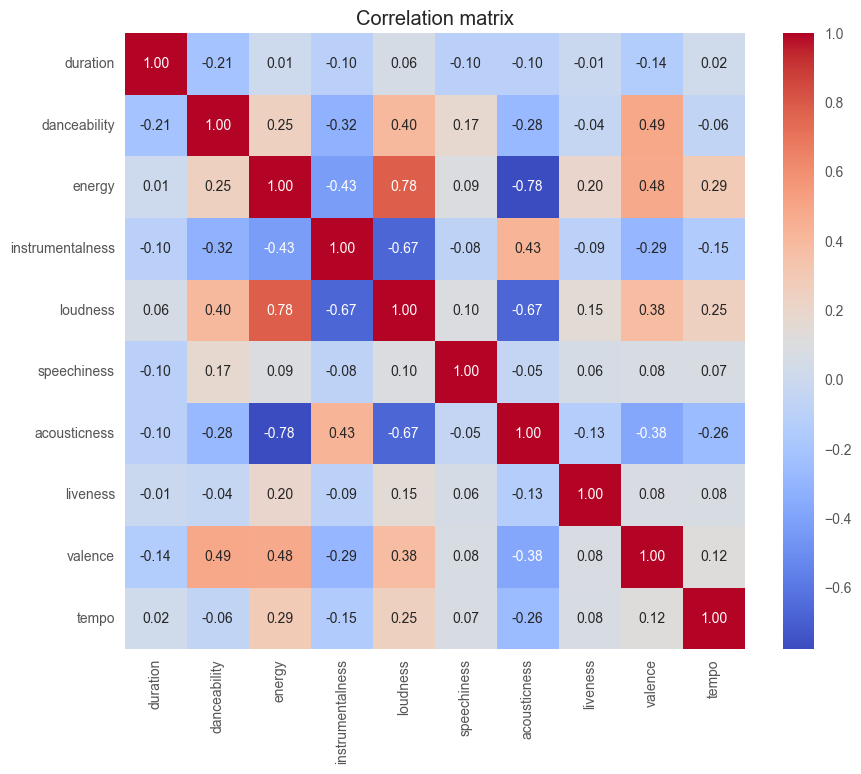

In [25]:
columns = ['duration', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
correlation_matrix = data[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

## Zmiana gatunków na bardziej ujednolicone formy. 
Spotify dysponuje wieloma gatunkami, np. pop, rock itp. ale również takimi neizanymi jak barbadian pop, a więc ujednolicimy je i np. z gatunku barbadian pop robimy gatunek pop. Operacja ta będzie potrzebna przy części projektu z predykcją popularności.

In [26]:
data['track genre'].value_counts()

track genre
dance pop            147
Inne                 143
album rock           124
pop                  114
alternative metal     97
                    ... 
acoustic punk          1
canadian indie         1
banjo                  1
dark cabaret           1
candy pop              1
Name: count, Length: 364, dtype: int64

In [27]:
data['new genre'] = data['track genre'].apply(change_genre)
data[['new genre', 'track genre']]

new genre         track genre
0          pop       barbadian pop
1      hip hop  east coast hip hop
2      hip hop             hip hop
3          pop             art pop
4         rock        classic rock
...        ...                 ...
2243     metal   alternative metal
2244     metal   alternative metal
2245      rock         modern rock
2246      rock         modern rock
2247     metal   alternative metal

[2122 rows x 2 columns]

In [28]:
number_genre = data.groupby('new genre').size().reset_index(name='count')
number_genre.sort_values(by='count', ascending=False)

new genre  count
8       other    654
9         pop    517
11       rock    351
7       metal    122
4     hip hop    119
10        rap     85
5       indie     81
1   classical     72
0       blues     49
12       soul     40
2       dance     21
3        folk      6
6        jazz      5

## Charakterystyka gatunków, ilości każdego z nich, analiza zmian popularności w zależności od gatunku.

C:\Users\HP\AppData\Local\Temp\ipykernel_13364\2568774531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new genre', y='count', data=number_genre, palette=colors)
C:\Users\HP\AppData\Local\Temp\ipykernel_13364\2568774531.py:3: UserWarning: 
The palette list has fewer values (6) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='new genre', y='count', data=number_genre, palette=colors)


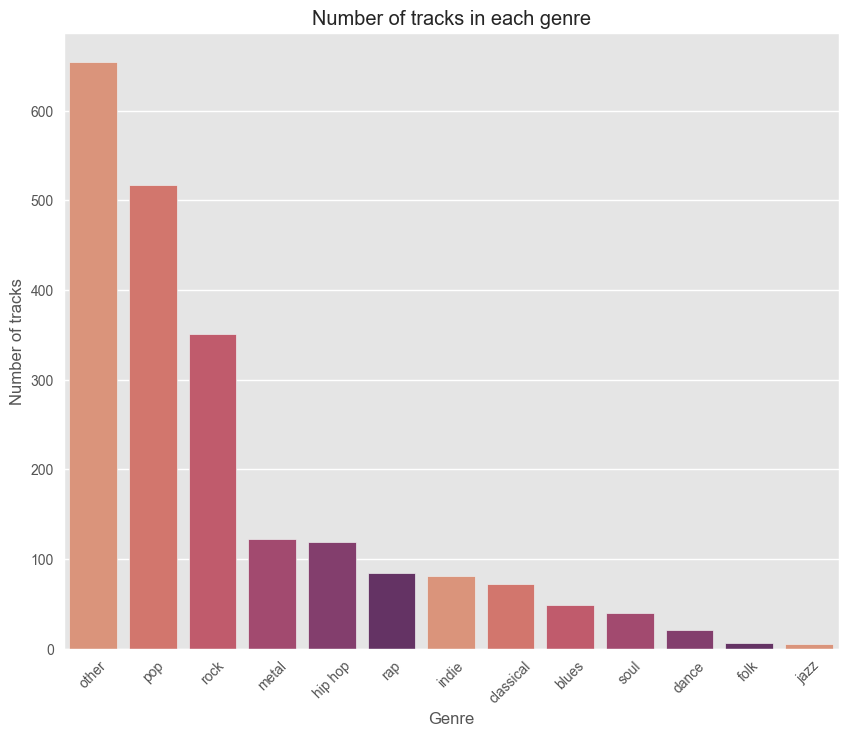

In [30]:
colors= sns.color_palette("flare", as_cmap=False)
number_genre = number_genre.sort_values(by='count', ascending=False)
sns.barplot(x='new genre', y='count', data=number_genre, palette=colors)
plt.xlabel('Genre')
plt.ylabel('Number of tracks')
plt.title('Number of tracks in each genre')
plt.xticks(rotation=45)
plt.show()

In [31]:
data.drop(columns='track genre', inplace=True)

In [32]:
data.head()

track              artist  \
0                            Desperado             Rihanna   
1                 Empire State Of Mind               JAY-Z   
2                ARE WE STILL FRIENDS?  Tyler, The Creator   
3                           i love you       Billie Eilish   
4  Bohemian Rhapsody - Remastered 2011               Queen   

                                      album  artist pop  track pop  duration  \
0                             ANTI (Deluxe)          87         71    186466   
1                           The Blueprint 3          80         83    276920   
2                                      IGOR          82         81    265480   
3  WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?          86         81    291796   
4      A Night At The Opera (2011 Remaster)          81         80    354320   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.680   0.609    -5.222       0.0440        0.3230   
1         0.491   0.956    -1.538       0.3920        0.0295   
2         0.216   0.497    -8.025       0.0371        0.1280   
3         0.421   0.131   -18.435       0.0382        0.9520   
4         0.411   0.404    -9.928       0.0511        0.2710   

   instrumentalness  liveness  valence    tempo  year new genre  
0          0.000000     0.102    0.325   94.350  2016       pop  
1          0.000000     0.460    0.811  173.585  2009   hip hop  
2          0.000002     0.111    0.313  187.308  2019   hip hop  
3          0.004530     0.109    0.120  137.446  2019       pop  
4          0.000000     0.300    0.226   71.068  1975      rock

C:\Users\HP\AppData\Local\Temp\ipykernel_13364\3684468882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='new genre', y='track pop', data=data, palette='Reds')


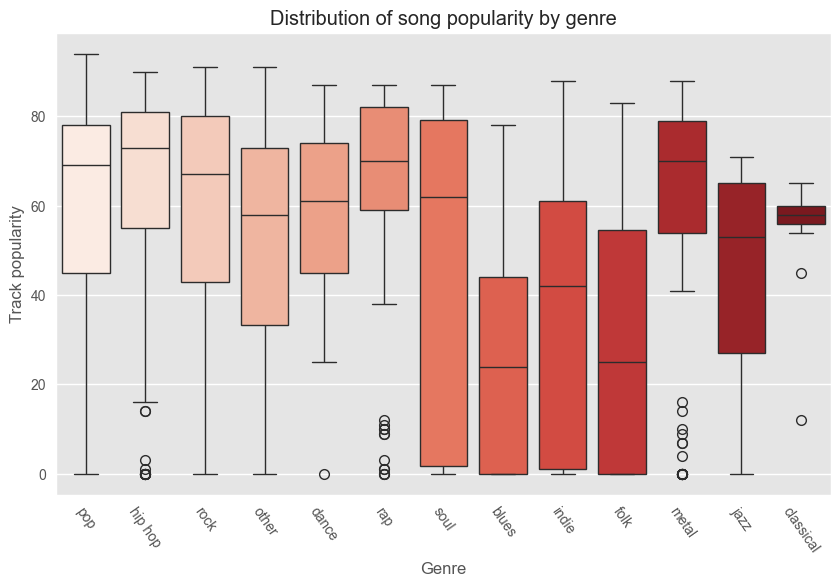

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='new genre', y='track pop', data=data, palette='Reds')
plt.title('Distribution of song popularity by genre')
plt.xlabel('Genre')
plt.ylabel('Track popularity')
plt.xticks(rotation=305)
plt.show()

## Sprawdzenie testem statystycznym czy średnia popularność piosenek zależy od gatunku. 

C:\Users\HP\AppData\Local\Temp\ipykernel_13364\1485413049.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new genre', y='track pop', data=avg_popularity_by_genre, palette='coolwarm')


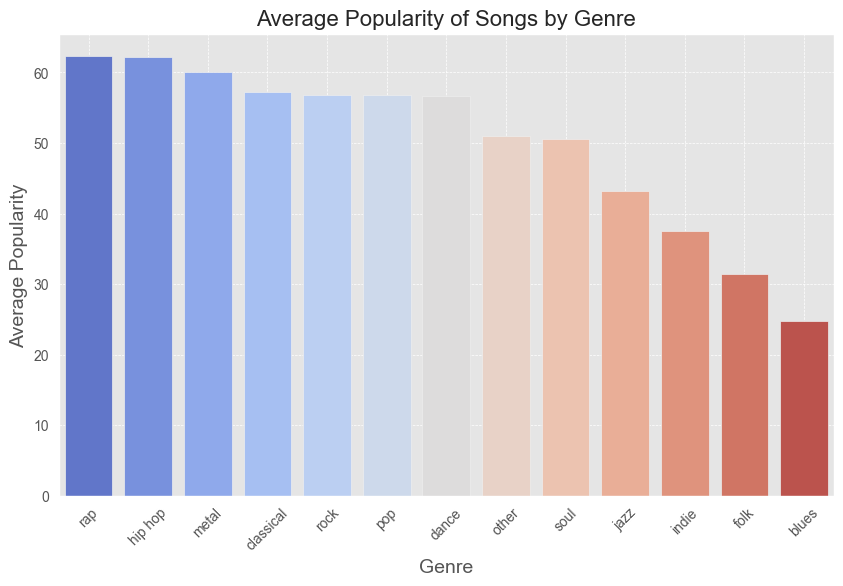

ANOVA test result: F-statistic = 10.788707341101784, p-value = 4.0157635654191164e-21
Wartość p jest mniejsza niż 0,05, co wskazuje, że istnieją statystycznie istotne różnice w średniej popularności utworów w różnych gatunkach”.


In [34]:
from scipy.stats import f_oneway


def show_average_popularity_by_genre(data):
    avg_popularity_by_genre = data.groupby('new genre')['track pop'].mean().reset_index()
    avg_popularity_by_genre = avg_popularity_by_genre.sort_values(by='track pop', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='new genre', y='track pop', data=avg_popularity_by_genre, palette='coolwarm')
    plt.title('Average Popularity of Songs by Genre', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Average Popularity', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
    
    genres = data['new genre'].unique()
    popularity_values = [data[data['new genre'] == genre]['track pop'].values for genre in genres]
    anova_result = f_oneway(*popularity_values)
    
    print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
    
    if anova_result.pvalue < 0.05:
        print("Wartość p jest mniejsza niż 0,05, co wskazuje, że istnieją statystycznie istotne różnice w średniej popularności utworów w różnych gatunkach”.")
    else:
        print("Wartość p jest większa niż 0,05, co wskazuje, że nie ma statystycznie istotnych różnic w średniej popularności utworów w różnych gatunkach.")


show_average_popularity_by_genre(data)


## Najpopularniejsze piosenki w każdym gatunku 

In [35]:
best_songs = data.loc[data.groupby('new genre')['track pop'].idxmax()]
best_songs[['track', 'new genre']]

track  new genre
1801                              Johnny B. Goode      blues
1241  Nocturne No. 2 in E-Flat Major, Op. 9 No. 2  classical
568                        Thank You (Not So Bad)      dance
1759                                     Fast Car       folk
1441             See You Again (feat. Kali Uchis)    hip hop
842                                   Lovers Rock      indie
1984       Nothing's Gonna Change My Love for You       jazz
312                                    In the End      metal
559                                         Pedro      other
1438                                 Cruel Summer        pop
1170                                   goosebumps        rap
1149                              Sweater Weather       rock
750                             Ain't No Sunshine       soul

## Sprawdzenie rozkładu popularności piosenek oraz artystów.

Text(0, 0.5, 'Frequency')

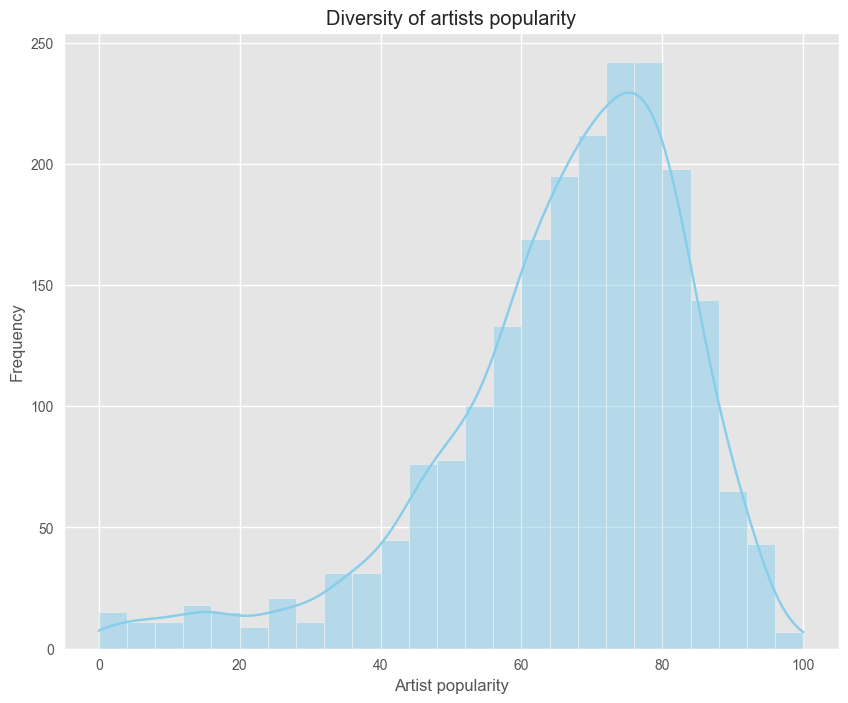

In [36]:
sns.histplot(x='artist pop', data=data, bins=25, kde=True, color='skyblue')
plt.title('Diversity of artists popularity')
plt.xlabel('Artist popularity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

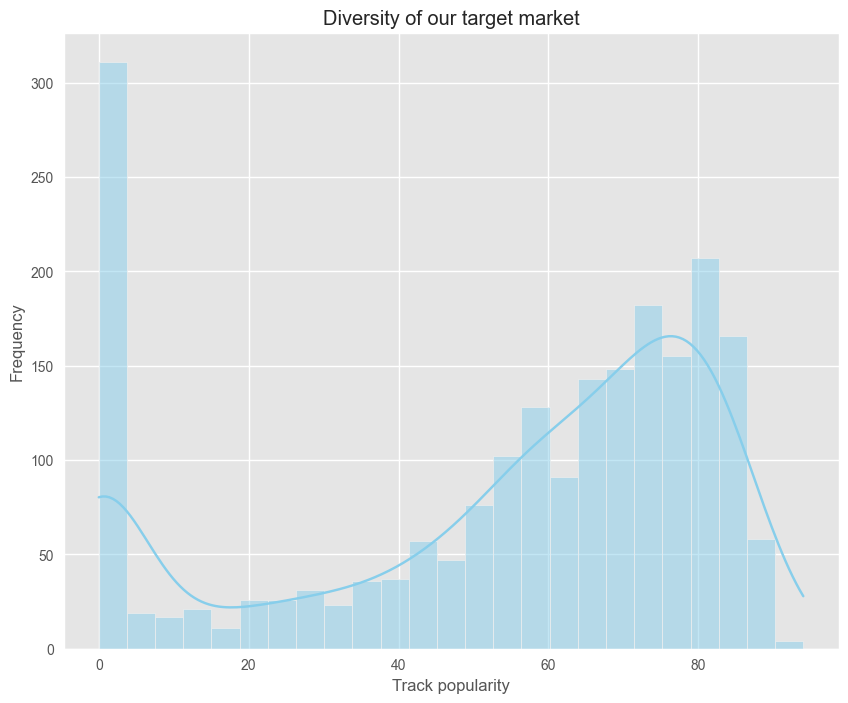

In [37]:
sns.histplot(x='track pop', data=data, bins=25, kde=True, color='skyblue')
plt.title('Diversity of our target market')
plt.xlabel('Track popularity')
plt.ylabel('Frequency')

In [38]:
data.to_csv('dane_po_EDA.csv')